Task 1: Read the lab notes and write down the purpose of each command in the this notebook.

In [1]:
from sklearn.datasets import load_digits
# imports a built in dataset of handwritten digit images

In [2]:
digits = load_digits()
# loads the digits dataset into a variable

In [3]:
print(digits.DESCR)
# prints a description of the dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [6]:
digits.target[1:20]
# Shows the true digit labels for a subset of the data

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.data.shape
# shows number of samples and features

(1797, 64)

In [8]:
digits.images[13]
# shows pixel matrix of a single digit image

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [9]:
digits.data[13]
# shows the flattened pixel values for the same digit image

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [10]:
digits.target[13]
# Shows the actual digit for the selected image

np.int64(3)

In [11]:
import matplotlib.pyplot as plt
# imports matplotlib for visualising images

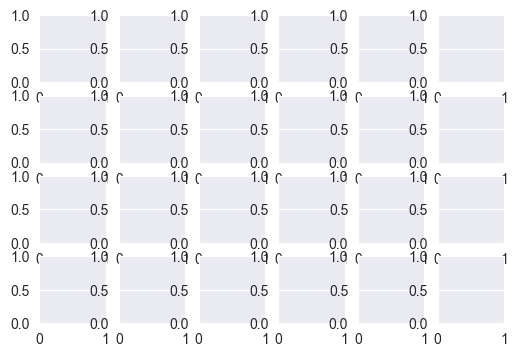

In [13]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
# creates a grid for displaying multiple images

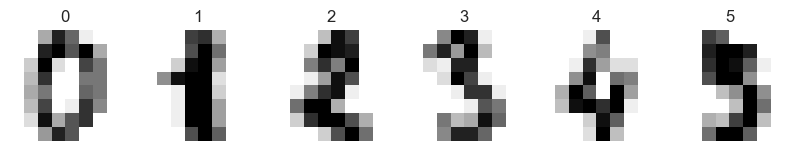

In [14]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.set_title(target)
    # displays several digit images with their corresponding labels

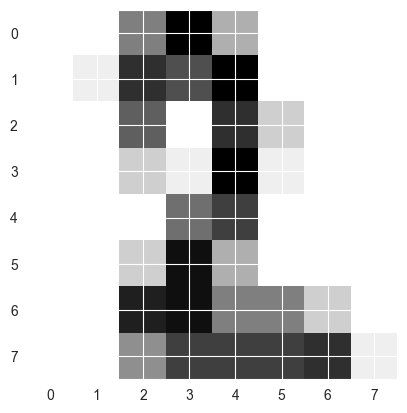

In [15]:
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
# Shows a single digit image using a grayscale colour map

In [16]:
from sklearn.model_selection import train_test_split
# Imports a function to split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)
# Splits the dataset into training and test data

In [17]:
X_train.shape # displays the shape of the training data

(1437, 64)

In [18]:
y_train.shape # displays the shape of the training labels

(1437,)

In [19]:
X_test.shape # displays the shape of the test feature data

(360, 64)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# imports the K-Nearest Neighbours classification algorithm

In [21]:
knn = KNeighborsClassifier()
# Creates a KNN classifier with default settings

In [22]:
knn.fit(X=X_train, y=y_train)
# trains the KNN model using the training data

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
predicted = knn.predict(X=X_test)
# Uses the trained model to predict labels for the test data

In [24]:
expected = y_test
# Stores the true labels for comparison

In [28]:
predicted[:20]
# Displays the first 20 predicted labels

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [27]:
expected[:20]
# Displays the first 20 actual labels

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [29]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
# Identifies predictions that do not match the actual labels

In [30]:
wrong
# Displays all incorrect predictions

[(np.int64(5), np.int64(3)),
 (np.int64(8), np.int64(9)),
 (np.int64(4), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(7), np.int64(4))]

In [31]:
print(f'{knn.score(X_test, y_test):.2%}')
# Prints the classification accuracy of the model

98.61%


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [34]:
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [35]:
from sklearn.metrics import classification_report

In [36]:
names = [str(digit) for digit in digits.target_names]

In [37]:
print(classification_report(expected, predicted,
          target_names=names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [38]:
import pandas as pd

In [39]:
confusion_df = pd.DataFrame(confusion, index=range(10),
         columns=range(10))

In [40]:
import seaborn as sns

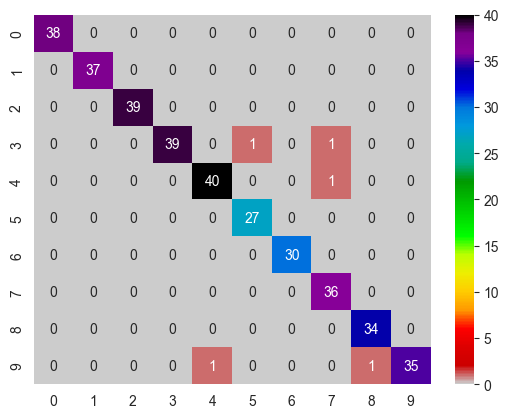

In [41]:
axes = sns.heatmap(confusion_df, annot=True,
         cmap='nipy_spectral_r')

In [42]:
from sklearn.model_selection import KFold

In [43]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(estimator=knn, X=digits.data,
    y=digits.target, cv=kfold)


In [47]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [46]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [48]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%
